# Resume Job Postings

2. Ranking job postings

In [1]:
# Setup
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Read the pickle file
df = pd.read_pickle('step1_df.pk')
df.head()

,title,body,bullets
2,"Data Scientist - Newark, CA","Data Scientist - Newark, CA\nData Scientist\n\...","(Design, develop, document and maintain machin..."
6,PwC Labs - Jr. Data Scientist - Machine Learni...,PwC Labs - Jr. Data Scientist - Machine Learni...,(Invite and provide evidence-based feedback in...
12,"Senior Data Scientist - Sunnyvale, CA 94089","Senior Data Scientist - Sunnyvale, CA 94089\nI...",(Ability to mentor and up level junior data sc...
14,"Data Scientist - Seattle, WA","Data Scientist - Seattle, WA\nMS with 2+ years...",(MS with 2+ years of industry experience or Ba...
15,"Data Scientist - Pasadena, CA 91107","Data Scientist - Pasadena, CA 91107\nJob Type:...",(Use statistical and programming software comb...


In [3]:
# Read the resume
try:
    with open('./data/Liveproject Resume.txt', 'r') as f:
        resume = f.read()
except:
    print('The resume is not in that directory')

In [7]:
# Prepare for vectorization
resume_dict = {'title':'resume','body':resume,'bullets':''}
df_with_resume = df.append(pd.DataFrame(resume_dict, index=[0]))
df_with_resume.head()

,title,body,bullets
2,"Data Scientist - Newark, CA","Data Scientist - Newark, CA\nData Scientist\n\...","(Design, develop, document and maintain machin..."
6,PwC Labs - Jr. Data Scientist - Machine Learni...,PwC Labs - Jr. Data Scientist - Machine Learni...,(Invite and provide evidence-based feedback in...
12,"Senior Data Scientist - Sunnyvale, CA 94089","Senior Data Scientist - Sunnyvale, CA 94089\nI...",(Ability to mentor and up level junior data sc...
14,"Data Scientist - Seattle, WA","Data Scientist - Seattle, WA\nMS with 2+ years...",(MS with 2+ years of industry experience or Ba...
15,"Data Scientist - Pasadena, CA 91107","Data Scientist - Pasadena, CA 91107\nJob Type:...",(Use statistical and programming software comb...


In [8]:
df_with_resume.tail()

,title,body,bullets
1323,"Lead Data Scientist - Portland, OR 97239","Lead Data Scientist - Portland, OR 97239\nOver...",(Work as part of a team of data scientists to ...
1328,Natural Language Processing and Machine Learni...,Natural Language Processing and Machine Learni...,(Academic / Industry experience in NLP and Mac...
1330,"Data Scientist - San Francisco, CA 94103","Data Scientist - San Francisco, CA 94103\nWant...",(Apply statistics techniques to improve Wish’s...
1332,"Data Scientist - Glen Mills, PA","Data Scientist - Glen Mills, PA\nSSRS Data Sci...","(Use machine learning methods (e.g., cluster a..."
0,resume,ï»¿Good Student\nData Scientist\n\t \n\nGood ...,


In [9]:
# Vectorize the dataframe
vectorizer = TfidfVectorizer(stop_words='english')
transformed_docs = vectorizer.fit_transform(df_with_resume['body'])
type(transformed_docs)

scipy.sparse.csr.csr_matrix

In [11]:
# Capture all job descriptions
tfidf_jobs = transformed_docs[:-1, :]
# Capture the resume part
tfidf_resume = transformed_docs[-1, :]

In [12]:
# Check shape of matrices
print('df_with_resume: ', df_with_resume.shape)
print('transformed_docs: ', transformed_docs.shape)
print('tfidf_jobs: ', tfidf_jobs.shape)

df_with_resume:  (542, 3)
transformed_docs:  (542, 10509)
tfidf_jobs:  (541, 10509)


In [14]:
# Calculate cosine similarity
cos_sims = cosine_similarity(tfidf_jobs, tfidf_resume)
print(cos_sims.shape) #(n_jobs, resume)

(541, 1)


In [15]:
# sort job postings based on cosine similarity
sorted_df = df.copy()
sorted_df['cosine_similarity'] = cos_sims
sorted_df.sort_values(by='cosine_similarity', ascending=False, inplace=True)
sorted_df.reset_index(inplace=True, drop=True)
sorted_df.head()

,title,body,bullets,cosine_similarity
0,Data Science Health Innovation Fellow Job - BI...,Data Science Health Innovation Fellow Job - BI...,"(Demonstrated ability to propose, initiate, an...",0.155612
1,Machine Learning Postdoctoral Fellow - San Fra...,Machine Learning Postdoctoral Fellow - San Fra...,(Design and develop distributed machine learni...,0.146193
2,Post-doc: Dissemination/implementation and/or ...,Post-doc: Dissemination/implementation and/or ...,(),0.091850
3,"Machine Learning Intern - San Diego, CA","Machine Learning Intern - San Diego, CA\nInnov...",(Design and develop machine learning models to...,0.085786
4,Data Science Summer Institute Student Intern -...,Data Science Summer Institute Student Intern -...,"(Students will work with scientists, engineers...",0.083359


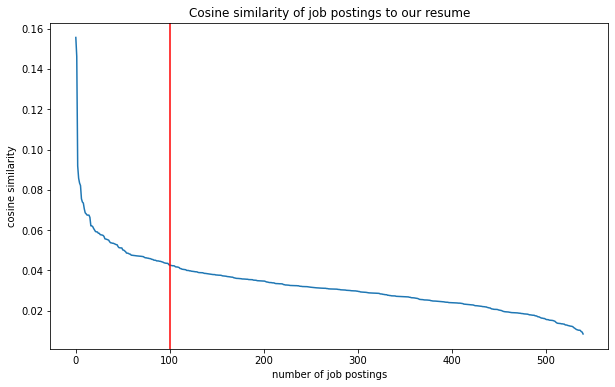

In [16]:
# Change the shape of the plot to fill the page a little better
plt.figure(figsize=(10, 6))
sorted_df['cosine_similarity'].plot()
plt.title('Cosine similarity of job postings to our resume')
plt.xlabel('number of job postings')
plt.ylabel('cosine similarity')
# Add a vertical red line at the x value of 100
# Sending the output of our last plt command to the underscore prevents it from printing text
_ = plt.axvline(100, c='r')

We can see from eyeballing the plot that after around 50-100 of the most similar postings is where the similarity starts to flatten out. So we’ll only use the 100 most similar postings for the next
parts of the analysis.

In [17]:
# copy the DataFrame
most_similar_df = sorted_df.iloc[:100].copy()
most_similar_df.head(10)

,title,body,bullets,cosine_similarity
0,Data Science Health Innovation Fellow Job - BI...,Data Science Health Innovation Fellow Job - BI...,"(Demonstrated ability to propose, initiate, an...",0.155612
1,Machine Learning Postdoctoral Fellow - San Fra...,Machine Learning Postdoctoral Fellow - San Fra...,(Design and develop distributed machine learni...,0.146193
2,Post-doc: Dissemination/implementation and/or ...,Post-doc: Dissemination/implementation and/or ...,(),0.091850
3,"Machine Learning Intern - San Diego, CA","Machine Learning Intern - San Diego, CA\nInnov...",(Design and develop machine learning models to...,0.085786
4,Data Science Summer Institute Student Intern -...,Data Science Summer Institute Student Intern -...,"(Students will work with scientists, engineers...",0.083359
5,"Senior Data Scientist, Education - Redwood Cit...","Senior Data Scientist, Education - Redwood Cit...","(Leverage data to understand product, identify...",0.082124
6,Bioinformatics Associate Data Scientist - San ...,Bioinformatics Associate Data Scientist - San ...,(Work on designing and implementing a framewor...,0.075557
7,data scientist - United States,data scientist - United States\nJob Summary\nA...,(Excellent understanding of machine learning t...,0.073980
8,Natural Language Processing and Machine Learni...,Natural Language Processing and Machine Learni...,(Academic / Industry experience in NLP and Mac...,0.073446
9,Data Scientist - United States,Data Scientist - United States\nEV Technologie...,"(Selecting features, building and optimizing c...",0.070614


In [18]:
# Sanity check - Title includes words data science/data scientist/machine learning
most_similar_df[most_similar_df['title'].str.contains('(data scientist)|(data science)|(machine learning)', case=False)].shape

C:\Users\sebastian.buitrago\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


(100, 4)

In [19]:
# Save the df in a pickle file
most_similar_df.to_pickle('step2_df.pk')